In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
!which ffmpeg

ffmpeg not found


In [3]:
plt.rcParams['animation.ffmpeg_path'] ='/usr/local/bin/ffmpeg'

In [4]:
import matplotlib.animation as animation
from IPython.display import HTML
from joblib import Parallel, delayed
import matplotlib.patches as mpatches

## Define 2D displacement

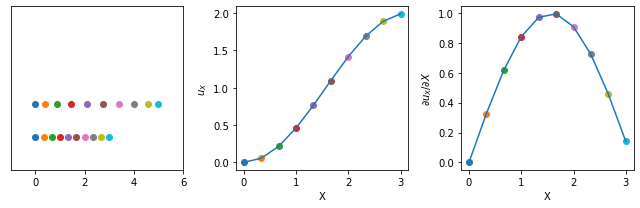

In [5]:
nsample=10
xl=[0,3]
xs=np.linspace(*xl,nsample)
ys=np.zeros(nsample)
u=-cos(xs)+1
du=sin(xs)

fig=plt.figure(figsize=(9,3))

ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

for i in range(len(xs)):
    l,=ax1.plot(xs[i],ys[i],'o',label='Initial')
    c=l.get_color()
    ax1.plot(xs[i]+u[i],ys[i]+1,'o',label='deformed',c=c)
    ax2.plot(xs[i],u[i],'o',c=c)
    ax3.plot(xs[i],du[i],'o',c=c)
    
ax2.plot(xs,u)
ax3.plot(xs,du)
ax1.set_yticks([])
ax1.set_ylim(-1,4)
ax1.set_xlim(-1,6)
ax2.set_xlabel('X')
ax3.set_xlabel('X')
ax2.set_ylabel(r'$u_X$')
ax3.set_ylabel(r'$\partial u_X/\partial X$')
fig.tight_layout()
fig.savefig('/tmp/1d_example.pdf')

## Define 2D displacement for compression

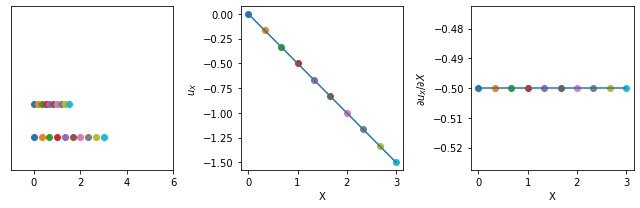

In [6]:
nsample=10
xl=[0,3]
xs=np.linspace(*xl,nsample)
ys=np.zeros(nsample)
u=-0.50*xs
du=-0.5*np.ones(nsample)

fig=plt.figure(figsize=(9,3))

ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

for i in range(len(xs)):
    l,=ax1.plot(xs[i],ys[i],'o',label='Initial')
    c=l.get_color()
    ax1.plot(xs[i]+u[i],ys[i]+1,'o',label='deformed',c=c)
    ax2.plot(xs[i],u[i],'o',c=c)
    ax3.plot(xs[i],du[i],'o',c=c)
    
ax2.plot(xs,u)
ax3.plot(xs,du)
ax1.set_yticks([])
ax1.set_ylim(-1,4)
ax1.set_xlim(-1,6)
ax2.set_xlabel('X')
ax3.set_xlabel('X')
ax2.set_ylabel(r'$u_X$')
ax3.set_ylabel(r'$\partial u_X/\partial X$')
fig.tight_layout()
fig.savefig('/tmp/1d_example.pdf')

# define 2D displacement field

In [7]:
nsample=10

In [8]:
xl=[0,5]
yl=[0,5]
xs=np.linspace(*xl,nsample)
ys=np.linspace(*yl,nsample)
X,Y=meshgrid(xs,ys)

$$u_X=-\cos Y$$
$$u_Y=0$$

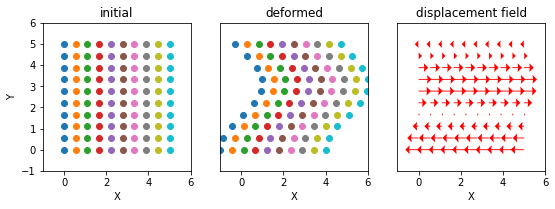

In [9]:
u_x=-np.cos(Y)
u_y=u_x.copy()
u_y[::]=0


fig=plt.figure(figsize=(9,3))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
ax1.plot(X,Y,'o')
ax2.plot(X+u_x,Y+u_y,'o')
ax3.quiver(X,Y,u_x,u_y,color='r',units='width',headwidth=10,headlength=5.0)

buf=1.0
ax1.set_xlim(xl[0]-buf,xl[1]+buf)
ax1.set_ylim(yl[0]-buf,yl[1]+buf)

for k in range(len(fig.axes)):
    ax=fig.axes[k]
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    #ax.set_ylabel('Y')
    if k>0:
        ax.set_yticks([])

ax1.set_ylabel('Y')    
ax1.set_title('initial')
ax2.set_title('deformed')
ax3.set_title('displacement field')

ylims=ax1.get_ylim()
xlims=ax1.set_xlim()
for ax in fig.axes[1:]:
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
fig.savefig('/tmp/m_cos.pdf')

$\partial u_X / \partial X=0$

$\partial u_X / \partial Y=-sin(Y)$

$\partial u_Y / \partial X=0$

$\partial u_Y / \partial Y=0$

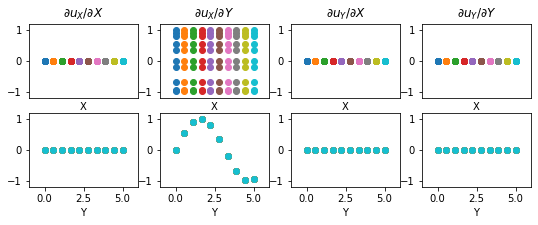

In [10]:
zeros=u_x.copy()
zeros[::]=0

du_xx=zeros.copy()
du_xy=sin(Y)
du_yx=zeros.copy()
du_yy=zeros.copy()

fig=plt.figure(figsize=(9,3))
ax1=fig.add_subplot(241)
ax2=fig.add_subplot(242)
ax3=fig.add_subplot(243)
ax4=fig.add_subplot(244)
ax5=fig.add_subplot(245)
ax6=fig.add_subplot(246)
ax7=fig.add_subplot(247)
ax8=fig.add_subplot(248)

ax1.plot(X,du_xx,'o')
ax2.plot(X,du_xy,'o')
ax3.plot(X,du_yx,'o')
ax4.plot(X,du_yy,'o')

ax5.plot(Y,du_xx,'o')
ax6.plot(Y,du_xy,'o')
ax7.plot(Y,du_yx,'o')
ax8.plot(Y,du_yy,'o')

ax1.set_title(r'$\partial{u_X}/\partial{X}$')
ax2.set_title(r'$\partial{u_X}/\partial{Y}$')
ax3.set_title(r'$\partial{u_Y}/\partial{X}$')
ax4.set_title(r'$\partial{u_Y}/\partial{Y}$')

for i in range(4):
    fig.axes[i].set_xlabel('X')
    fig.axes[i+4].set_xlabel('Y')
    fig.axes[i].set_ylim(-1.2,1.2)
    fig.axes[i+4].set_ylim(-1.2,1.2)    
    fig.axes[i].set_xticks([])
    
    fig.axes[i].set_xlim(xl[0]-buf,xl[1]+buf)
    fig.axes[i+4].set_xlim(xl[0]-buf,xl[1]+buf)    
    #fig.axes[i].set_ylim(yl[0]-buf,yl[1]+buf)
    
fig.savefig('/tmp/m_cos_du.pdf')    

/var/folders/3m/gn4vlgqs7x3bpd9_l4prn97c0000gn/T/ipykernel_45087/3651427502.py:38: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(cs)


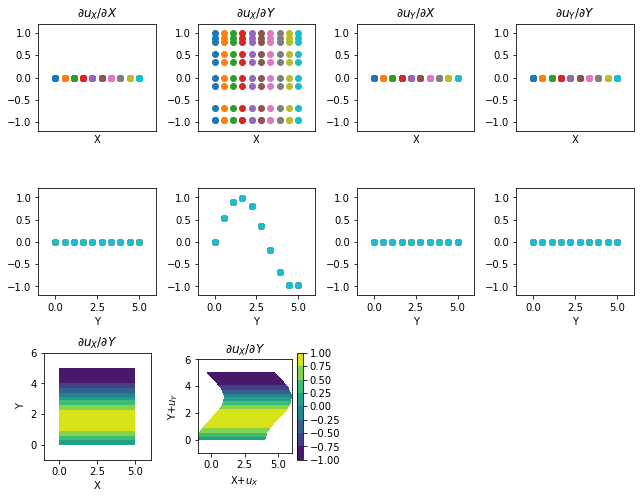

In [11]:
zeros=u_x.copy()
zeros[::]=0

du_xx=zeros.copy()
du_xy=sin(Y)
du_yx=zeros.copy()
du_yy=zeros.copy()

fig=plt.figure(figsize=(9,7))

ax1=fig.add_subplot(341)
ax2=fig.add_subplot(342)
ax3=fig.add_subplot(343)
ax4=fig.add_subplot(344)
ax5=fig.add_subplot(345)
ax6=fig.add_subplot(346)
ax7=fig.add_subplot(347)
ax8=fig.add_subplot(348)
ax9=fig.add_subplot(349)
ax10=fig.add_subplot(3,4,10)

ax1.plot(X,du_xx,'o')
ax2.plot(X,du_xy,'o')
ax3.plot(X,du_yx,'o')
ax4.plot(X,du_yy,'o')

ax5.plot(Y,du_xx,'o')
ax6.plot(Y,du_xy,'o')
ax7.plot(Y,du_yx,'o')
ax8.plot(Y,du_yy,'o')

k=0
for ax in [ax9,ax10]:
    k=k+1

    if k==1: 
        cs=ax.contourf(X,Y,du_xy)
        fig.colorbar(cs)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')        
    else:
        cs=ax.contourf(X+u_x,Y+u_y,du_xy)
        ax.set_xlabel(r'X+$u_X$')
        ax.set_ylabel(r'Y+$u_Y$')        
    ax.set_aspect('equal')
    ax.set_xlim(-1,6)
    ax.set_ylim(-1,6)
    ax.set_title(r'$\partial u_X / \partial Y$')


ax1.set_title(r'$\partial{u_X}/\partial{X}$')
ax2.set_title(r'$\partial{u_X}/\partial{Y}$')
ax3.set_title(r'$\partial{u_Y}/\partial{X}$')
ax4.set_title(r'$\partial{u_Y}/\partial{Y}$')

for i in range(4):
    fig.axes[i].set_xlabel('X')
    fig.axes[i+4].set_xlabel('Y')
    fig.axes[i].set_ylim(-1.2,1.2)
    fig.axes[i+4].set_ylim(-1.2,1.2)    
    fig.axes[i].set_xticks([])
    
    fig.axes[i].set_xlim(xl[0]-buf,xl[1]+buf)
    fig.axes[i+4].set_xlim(xl[0]-buf,xl[1]+buf)    
    #fig.axes[i].set_ylim(yl[0]-buf,yl[1]+buf)
fig.tight_layout()    
fig.savefig('/tmp/m_cos_du.pdf')    

## Complicated 2D example

In [12]:
xl=[0,5]
yl=[0,5]
xs=np.linspace(*xl,nsample)
ys=np.linspace(*yl,nsample)
X,Y=meshgrid(xs,ys)

$$u_X=X$$
$$u_Y=Y$$

In [13]:
buf=1.0
ax1.set_xlim(xl[0]-buf,xl[1]+buf)
ax1.set_ylim(yl[0]-buf,yl[1]+buf)

(-1.0, 6.0)

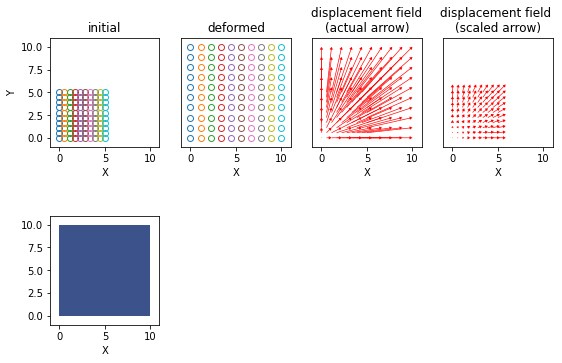

In [14]:
u_x=X
u_y=Y

du_xx=X.copy()
du_xy=X.copy()
du_yx=X.copy()
du_yy=X.copy()

du_xx[::]=1
du_xy[::]=0
du_yx[::]=0
du_yy[::]=1


fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(241)
ax2=fig.add_subplot(242)
ax3=fig.add_subplot(243)
ax4=fig.add_subplot(244)
ax5=fig.add_subplot(245)
ax1.plot(X,Y,'o',mfc='None')
ax2.plot(X+u_x,Y+u_y,'o',mfc="None")
ax3.quiver(X,Y,u_x,u_y,color='r',scale_units='y',scale=1,headwidth=5,headlength=4.0)
ax4.quiver(X,Y,u_x,u_y,color='r',scale_units='y',headwidth=5,headlength=4.0)

ax5.contourf(X+u_x,Y+u_y,du_xx)

buf=1.0
ax1.set_xlim(xl[0]+u_x[0][0]-buf,xl[1]+u_x[-1][-1]+buf)
ax1.set_ylim(yl[0]+u_y[0][0]-buf,yl[1]+u_y[-1][-1]+buf)

for k in range(len(fig.axes[:])):
    ax=fig.axes[k]
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    #ax.set_ylabel('Y')
    if 0<k<4:
        ax.set_yticks([])

ax1.set_ylabel('Y')    
ax1.set_title('initial')
ax2.set_title('deformed')
ax3.set_title(r"""displacement field
(actual arrow)""")
ax4.set_title(r"""displacement field 
(scaled arrow)""")

ylims=ax1.get_ylim()
xlims=ax1.set_xlim()
for ax in fig.axes[1:]:
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
fig.savefig('/tmp/biaxial.pdf')

## Complicated 2D example

In [15]:
xl=[0,5]
yl=[0,5]
xs=np.linspace(*xl,nsample)
ys=np.linspace(*yl,nsample)
X,Y=meshgrid(xs,ys)

$$u_X=0.5Y$$
$$u_Y=0.5X$$

In [16]:
buf=1.0
ax1.set_xlim(xl[0]-buf,xl[1]+buf)
ax1.set_ylim(yl[0]-buf,yl[1]+buf)

(-1.0, 6.0)

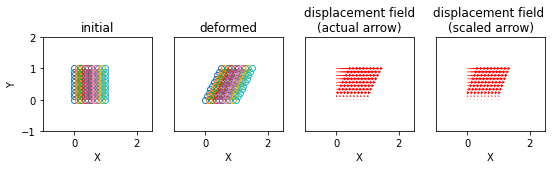

In [139]:
#u_x=0*X+0.5*Y
#u_y=-0.5*Y+0*X
#u_y[::]=0

r=np.zeros((2,2))
r[0,0]=0
r[0,1]=0.5
r[1,0]=0.
r[1,1]=0
u_x=r[0,0]*X+r[0,1]*Y
u_y=r[1,0]*X+r[1,1]*Y



fig=plt.figure(figsize=(9,3))
ax1=fig.add_subplot(141)
ax2=fig.add_subplot(142)
ax3=fig.add_subplot(143)
ax4=fig.add_subplot(144)
ax1.plot(X,Y,'o',mfc='None')
ax2.plot(X+u_x,Y+u_y,'o',mfc="None")
ax3.quiver(X,Y,u_x,u_y,color='r',scale_units='y',scale=1,headwidth=5,headlength=4.0)
ax4.quiver(X,Y,u_x,u_y,color='r',scale_units='y',headwidth=5,headlength=4.0)

buf=1.0
ax1.set_xlim(xl[0]+u_x[0][0]-buf,xl[1]+u_x[-1][-1]+buf)
ax1.set_ylim(yl[0]+u_y[0][0]-buf,yl[1]+u_y[-1][-1]+buf)

for k in range(len(fig.axes)):
    ax=fig.axes[k]
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    #ax.set_ylabel('Y')
    if k>0:
        ax.set_yticks([])

ax1.set_ylabel('Y')    
ax1.set_title('initial')
ax2.set_title('deformed')
ax3.set_title(r"""displacement field
(actual arrow)""")
ax4.set_title(r"""displacement field 
(scaled arrow)""")

ylims=ax1.get_ylim()
xlims=ax1.set_xlim()
for ax in fig.axes[1:]:
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
fig.savefig('/tmp/biaxial.pdf')

## Complicated 2D example

In [18]:
xl=[0,5]
yl=[0,5]
xs=np.linspace(*xl,nsample)
ys=np.linspace(*yl,nsample)
X,Y=meshgrid(xs,ys)

$$u_X=X$$
$$u_Y=Y$$

In [19]:
buf=1.0
ax1.set_xlim(xl[0]-buf,xl[1]+buf)
ax1.set_ylim(yl[0]-buf,yl[1]+buf)

(-1.0, 6.0)

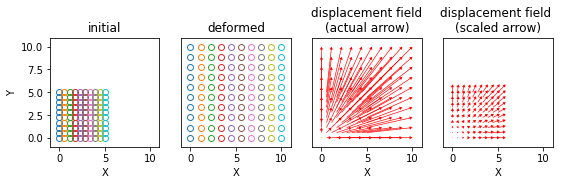

In [20]:
u_x=X
u_y=Y
#u_y[::]=0


fig=plt.figure(figsize=(9,3))
ax1=fig.add_subplot(141)
ax2=fig.add_subplot(142)
ax3=fig.add_subplot(143)
ax4=fig.add_subplot(144)
ax1.plot(X,Y,'o',mfc='None')
ax2.plot(X+u_x,Y+u_y,'o',mfc="None")
ax3.quiver(X,Y,u_x,u_y,color='r',scale_units='y',scale=1,headwidth=5,headlength=4.0)
ax4.quiver(X,Y,u_x,u_y,color='r',scale_units='y',headwidth=5,headlength=4.0)

buf=1.0
ax1.set_xlim(xl[0]+u_x[0][0]-buf,xl[1]+u_x[-1][-1]+buf)
ax1.set_ylim(yl[0]+u_y[0][0]-buf,yl[1]+u_y[-1][-1]+buf)

for k in range(len(fig.axes)):
    ax=fig.axes[k]
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    #ax.set_ylabel('Y')
    if k>0:
        ax.set_yticks([])

ax1.set_ylabel('Y')    
ax1.set_title('initial')
ax2.set_title('deformed')
ax3.set_title(r"""displacement field
(actual arrow)""")
ax4.set_title(r"""displacement field 
(scaled arrow)""")

ylims=ax1.get_ylim()
xlims=ax1.set_xlim()
for ax in fig.axes[1:]:
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
fig.savefig('/tmp/biaxial.pdf')

## Complicated 2D example

In [21]:
xl=[0,5]
yl=[0,5]
xs=np.linspace(*xl,nsample)
ys=np.linspace(*yl,nsample)
X,Y=meshgrid(xs,ys)

$$u_X=X-Y$$
$$u_Y=Y-X$$

In [22]:
buf=1.0
ax1.set_xlim(xl[0]-buf,xl[1]+buf)
ax1.set_ylim(yl[0]-buf,yl[1]+buf)

(-1.0, 6.0)

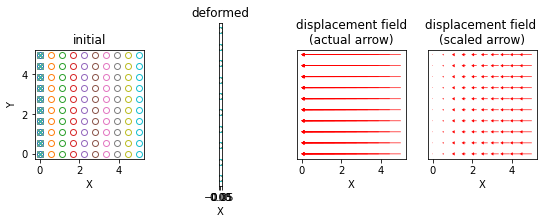

In [23]:
u_x=-X
u_y=0
#u_y[::]=0


fig=plt.figure(figsize=(9,3))
ax1=fig.add_subplot(141)
ax2=fig.add_subplot(142)
ax3=fig.add_subplot(143)
ax4=fig.add_subplot(144)
ax1.plot(X,Y,'o',mfc='None')
ax2.plot(X+u_x,Y+u_y,'o',mfc="None")
ax1.plot(X+u_x,Y+u_y,'x',mfc="None")
ax3.quiver(X,Y,u_x,u_y,color='r',scale_units='y',scale=1,headwidth=5,headlength=4.0)
ax4.quiver(X,Y,u_x,u_y,color='r',scale_units='y',headwidth=5,headlength=4.0)

#buf=1.0
#ax1.set_xlim(xl[0]+u_x[0][0]-buf,xl[1]+u_x[-1][-1]+buf)
#ax1.set_ylim(yl[0]+u_y[0][0]-buf,yl[1]+u_y[-1][-1]+buf)

for k in range(len(fig.axes)):
    ax=fig.axes[k]
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    #ax.set_ylabel('Y')
    if k>0:
        ax.set_yticks([])

ax1.set_ylabel('Y')    
ax1.set_title('initial')
ax2.set_title('deformed')
ax3.set_title(r"""displacement field
(actual arrow)""")
ax4.set_title(r"""displacement field 
(scaled arrow)""")

#ylims=ax1.get_ylim()
#xlims=ax1.set_xlim()
#for ax in fig.axes[1:]:
#    ax.set_xlim(xlims)
#    ax.set_ylim(ylims)
    
fig.savefig('/tmp/biaxial.pdf')

## polar shape

In [24]:
r=np.linspace(0,1,50)
theta=np.linspace(-pi,pi,50)
R,T= numpy.meshgrid(r,theta)
X=R*cos(T)
Y=R*sin(T)

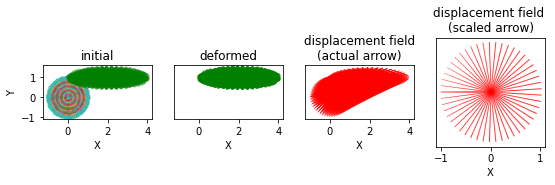

In [25]:
u_x=X+2
u_y=-Y*0.5 +1
#u_y[::]=0


fig=plt.figure(figsize=(9,3))
ax1=fig.add_subplot(141)
ax2=fig.add_subplot(142)
ax3=fig.add_subplot(143)
ax4=fig.add_subplot(144)
ax1.plot(X,Y,'.',mfc='None')
ax2.plot(X+u_x,Y+u_y,'g.',mfc="None")
ax1.plot(X+u_x,Y+u_y,'g.',mfc="None",alpha=0.5)
ax3.quiver(X,Y,u_x,u_y,color='r',scale_units='y',scale=1,headwidth=5,headlength=4.0)
ax4.quiver(X,Y,u_x,u_y,color='r',scale_units='y',headwidth=5,headlength=4.0)

buf=1.0
#ax1.set_xlim(xl[0]+u_x[0][0]-buf,xl[1]+u_x[-1][-1]+buf)
#ax1.set_ylim(yl[0]+u_y[0][0]-buf,yl[1]+u_y[-1][-1]+buf)

for k in range(len(fig.axes)):
    ax=fig.axes[k]
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    #ax.set_ylabel('Y')
    if k>0:
        ax.set_yticks([])

ax1.set_ylabel('Y')    
ax1.set_title('initial')
ax2.set_title('deformed')
ax3.set_title(r"""displacement field
(actual arrow)""")
ax4.set_title(r"""displacement field 
(scaled arrow)""")

ylims=ax1.get_ylim()
xlims=ax1.set_xlim()
for ax in fig.axes[:3]:
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
fig.savefig('/tmp/uniaxial.pdf')

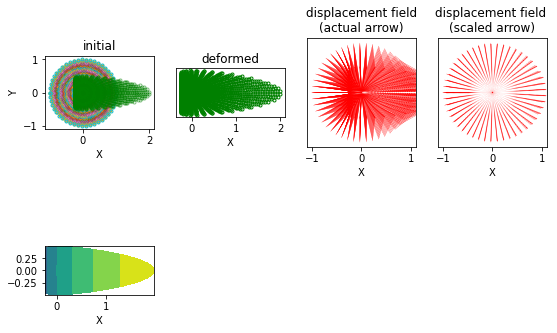

In [26]:
u_x=X**2
u_y=-Y*0.5
#u_y[::]=0
du_xx=2*X
du_xy=0
du_yx=0
du_yy=-0.5



fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(241)
ax2=fig.add_subplot(242)
ax3=fig.add_subplot(243)
ax4=fig.add_subplot(244)
ax5=fig.add_subplot(245)
ax1.plot(X,Y,'.',mfc='None')
ax2.plot(X+u_x,Y+u_y,'g.',mfc="None")
ax1.plot(X+u_x,Y+u_y,'g.',mfc="None",alpha=0.5)
ax3.quiver(X,Y,u_x,u_y,color='r',scale_units='y',scale=1,headwidth=5,headlength=4.0)
ax4.quiver(X,Y,u_x,u_y,color='r',scale_units='y',headwidth=5,headlength=4.0)

ax5.contourf(X+u_x,Y+u_y,du_xx)

buf=1.0
#ax1.set_xlim(xl[0]+u_x[0][0]-buf,xl[1]+u_x[-1][-1]+buf)
#ax1.set_ylim(yl[0]+u_y[0][0]-buf,yl[1]+u_y[-1][-1]+buf)

for k in range(len(fig.axes)):
    ax=fig.axes[k]
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    #ax.set_ylabel('Y')
    if 0<k<4:
        ax.set_yticks([])

ax1.set_ylabel('Y')    
ax1.set_title('initial')
ax2.set_title('deformed')
ax3.set_title(r"""displacement field
(actual arrow)""")
ax4.set_title(r"""displacement field 
(scaled arrow)""")

ylims=ax1.get_ylim()
xlims=ax2.set_xlim()
#for ax in fig.axes[1:]:
#    ax.set_xlim(xlims)
#    ax.set_ylim(ylims)
    
fig.savefig('/tmp/uniaxial.pdf')

## cylindrical coordinate system

In [27]:
r=np.linspace(1,1,1)
theta=np.linspace(-pi,pi,60)
z=np.linspace(0,1,20)
R,T,Z=numpy.meshgrid(r,theta,z)


Xs=R*cos(T)
Ys=R*sin(T)
Zs=Z.copy()

In [28]:
U_r=0.
U_z=0.
U_t=0.5*Z
R=R+U_r
T=T+U_t
Z=Z+U_z

xs=R*cos(T)
ys=R*sin(T)
zs=Z.copy()

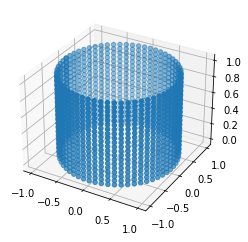

In [29]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(Xs,Ys,Zs)
fig.savefig('/tmp/cylinder0.pdf')

In [30]:
ys.shape

(60, 1, 20)

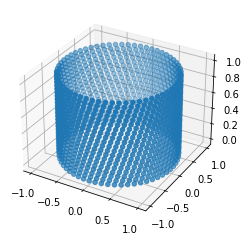

In [31]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(xs,ys,zs)
fig.savefig('/tmp/cylinder1.pdf')

## 3D uniaxial tension

In [32]:
rm -fr /tmp/3d_uni*.png

zsh:1: no matches found: /tmp/3d_uni*.png


CPU times: user 1min 48s, sys: 4.93 s, total: 1min 53s
Wall time: 1min 35s


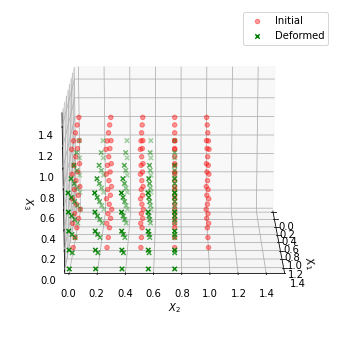

In [33]:
%%time
x=np.linspace(0,1,5)
y=np.linspace(0,1,5)
z=np.linspace(0,1,5)
X,Y,Z= numpy.meshgrid(x,y,z)

u_x=0.5*X
u_y=-0.25*Y
u_z=-0.25*Z

X1,X2,X3=X+u_x,Y+u_y,Z+u_z

fig=plt.figure(figsize=(6,6))
ax1=fig.add_subplot(111,projection='3d')
#ax2=fig.add_subplot(122,projection='3d')
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax1.scatter(X,Y,Z,c='r',alpha=0.4,label='Initial')
ax1.scatter(X1,X2,X3,c='g',marker='x',label='Deformed')
#ax1.set_aspect('equal')
ax1.set_xlim(0,1.5)
ax1.set_ylim(0,1.5)
ax1.set_zlim(0,1.5)
ax1.set_xlabel(r'$X_1$')
ax1.set_ylabel(r'$X_2$')
ax1.set_zlabel(r'$X_3$')
ax1.legend()
angs=np.linspace(0,360,120)
for ii in range(len(angs)):
    ax1.view_init(elev=15., azim=angs[ii])
    #fig.savefig("movie%d.png" % ii)
    fig.savefig('/tmp/3d_uni%4.4i.png'%ii,dpi=400)

In [34]:
#!rm out.mp4
!ffmpeg -y -r 10 -i /tmp/3d_uni%04d.png -c:v libx264 -vf "fps=25,format=yuv420p" out.mp4
!open out.mp4

zsh:1: command not found: ffmpeg
The file /Users/youngung/repo/lectures/ipynb/metalforming/out.mp4 does not exist.


## 좌표계의 임의 선택

In [35]:
r=np.linspace(1,1,1)
theta=np.linspace(-pi,pi,50)
R,T= numpy.meshgrid(r,theta)
X=R*cos(T)
Y=R*sin(T)

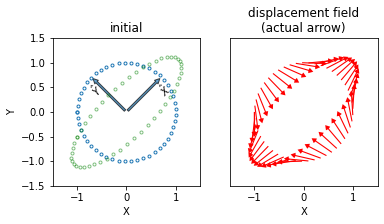

In [36]:
u_x=0.5*Y
u_y=0.5*X
#u_y[::]=0


fig=plt.figure(figsize=(9,3))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
#ax3=fig.add_subplot(133)
#ax4=fig.add_subplot(144)
ax1.plot(X,Y,'.',mfc='None')
#ax2.plot(X+u_x,Y+u_y,'g.',mfc="None")
ax1.plot(X+u_x,Y+u_y,'g.',mfc="None",alpha=0.5)
ax2.quiver(X,Y,u_x,u_y,color='r',scale_units='y',scale=1,headwidth=5,headlength=4.0)
#ax4.quiver(X,Y,u_x,u_y,color='r',scale_units='y',headwidth=5,headlength=4.0)


##
a1 = mpatches.FancyArrowPatch((0,0), (1/np.sqrt(2),1./np.sqrt(2)),alpha=0.7,
                                 mutation_scale=10)
a2 = mpatches.FancyArrowPatch((0,0), (-1/np.sqrt(2),1./np.sqrt(2)),alpha=0.7,
                                 mutation_scale=10)
ax1.add_patch(a1);ax1.add_patch(a2)
ax1.text(0.6,0.3,r'$\hat{X}$',rotation=45)
ax1.text(-0.8,0.3,r'$\hat{Y}$',rotation=45)
##


buf=1.0
#ax1.set_xlim(xl[0]+u_x[0][0]-buf,xl[1]+u_x[-1][-1]+buf)
#ax1.set_ylim(yl[0]+u_y[0][0]-buf,yl[1]+u_y[-1][-1]+buf)

for k in range(len(fig.axes)):
    ax=fig.axes[k]
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    #ax.set_ylabel('Y')
    if k>0:
        ax.set_yticks([])

ax1.set_ylabel('Y')    
ax1.set_title('initial')
ax2.set_title(r"""displacement field
(actual arrow)""")
#ax4.set_title(r"""displacement field 
#(scaled arrow)""")

#ylims=ax1.get_ylim()
#xlims=ax1.set_xlim()
for ax in fig.axes[:3]:
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    
fig.savefig('/tmp/basis_0.pdf')

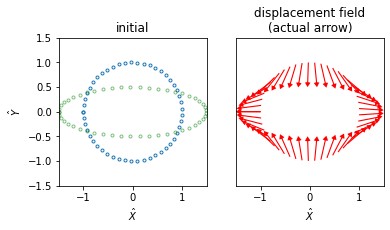

In [37]:
u_x=0.5*X
u_y=-0.5*Y
#u_y[::]=0


fig=plt.figure(figsize=(9,3))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
#ax3=fig.add_subplot(133)
#ax4=fig.add_subplot(144)
ax1.plot(X,Y,'.',mfc='None')
#ax2.plot(X+u_x,Y+u_y,'g.',mfc="None")
ax1.plot(X+u_x,Y+u_y,'g.',mfc="None",alpha=0.5)
ax2.quiver(X,Y,u_x,u_y,color='r',scale_units='y',scale=1,headwidth=5,headlength=4.0)
#ax4.quiver(X,Y,u_x,u_y,color='r',scale_units='y',headwidth=5,headlength=4.0)


##
#a1 = mpatches.FancyArrowPatch((0,0), (1/np.sqrt(2),1./np.sqrt(2)),alpha=0.7,
#                                 mutation_scale=10)
#a2 = mpatches.FancyArrowPatch((0,0), (-1/np.sqrt(2),1./np.sqrt(2)),alpha=0.7,
#                                 mutation_scale=10)
#ax1.add_patch(a1);ax1.add_patch(a2)
#ax1.text(0.6,0.3,r'$\hat{X}$',rotation=45)
#ax1.text(-0.8,0.3,r'$\hat{Y}$',rotation=45)
##


buf=1.0
#ax1.set_xlim(xl[0]+u_x[0][0]-buf,xl[1]+u_x[-1][-1]+buf)
#ax1.set_ylim(yl[0]+u_y[0][0]-buf,yl[1]+u_y[-1][-1]+buf)

for k in range(len(fig.axes)):
    ax=fig.axes[k]
    ax.set_aspect('equal')
    ax.set_xlabel(r'$\hat{X}$')
    #ax.set_ylabel('Y')
    if k>0:
        ax.set_yticks([])

ax1.set_ylabel(r'$\hat{Y}$')    
ax1.set_title('initial')
ax2.set_title(r"""displacement field
(actual arrow)""")
#ax4.set_title(r"""displacement field 
#(scaled arrow)""")

#ylims=ax1.get_ylim()
#xlims=ax1.set_xlim()
for ax in fig.axes[:3]:
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    
fig.savefig('/tmp/basis_1.pdf')

## Complicated 2D example

In [38]:
xl=[0,5]
yl=[0,5]
xs=np.linspace(*xl,nsample)
ys=np.linspace(*yl,nsample)
X,Y=meshgrid(xs,ys)

$$u_X=X$$
$$u_Y=Y$$

In [39]:
buf=5.0
ax1.set_xlim(xl[0]-buf,xl[1]+buf)
ax1.set_ylim(yl[0]-buf,yl[1]+buf)

(-5.0, 10.0)

In [40]:
def calc_rot(th):
    t=th*np.pi/180.
    rect=np.pi/2.
    r=np.zeros((2,2))
    r[0,0]=cos(t)-1
    r[0,1]=cos(rect+t)
    r[1,0]=cos(rect-t)
    r[1,1]=cos(t)-1
    
    return r

[[-0.29289322 -0.70710678]
 [ 0.70710678 -0.29289322]]


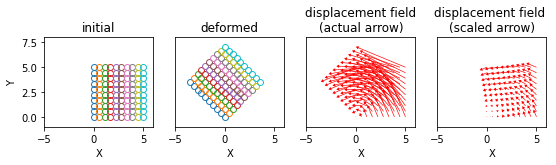

In [42]:
th=45.
r=calc_rot(th)
print(r)

u_x=r[0,0]*X+r[0,1]*Y
u_y=r[1,0]*X+r[1,1]*Y
#u_y[::]=0

fig=plt.figure(figsize=(9,3))
ax1=fig.add_subplot(141)
ax2=fig.add_subplot(142)
ax3=fig.add_subplot(143)
ax4=fig.add_subplot(144)
ax1.plot(X,Y,'o',mfc='None')
ax2.plot(X+u_x,Y+u_y,'o',mfc="None")
ax3.quiver(X,Y,u_x,u_y,color='r',scale_units='y',scale=1,headwidth=5,headlength=4.0)
ax4.quiver(X,Y,u_x,u_y,color='r',scale_units='y',headwidth=5,headlength=4.0)

buf=1.0
#ax1.set_xlim(xl[0]+u_x[0][0]-buf,xl[1]+u_x[-1][-1]+buf)
#ax1.set_ylim(yl[0]+u_y[0][0]-buf,yl[1]+u_y[-1][-1]+buf)

for k in range(len(fig.axes)):
    ax=fig.axes[k]
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    #ax.set_ylabel('Y')
    if k>0:
        ax.set_yticks([])

ax1.set_ylabel('Y')
ax1.set_title('initial')
ax2.set_title('deformed')
ax3.set_title(r"""displacement field
(actual arrow)""")
ax4.set_title(r"""displacement field 
(scaled arrow)""")

#ylims=ax2.get_ylim()
#xlims=ax2.set_xlim()
#for ax in fig.axes[:]:
#    ax.set_xlim(xlims)
#    ax.set_ylim(ylims)
for ax in fig.axes[::]:
    ax.set_xlim(-5,6)
    ax.set_ylim(-1,8)
    
fig.savefig('/tmp/pure_rotation.pdf')

In [119]:
nsample=10
xl=[0,1]
yl=[0,1]
xs=np.linspace(*xl,nsample)
ys=np.linspace(*yl,nsample)
X,Y=meshgrid(xs,ys)

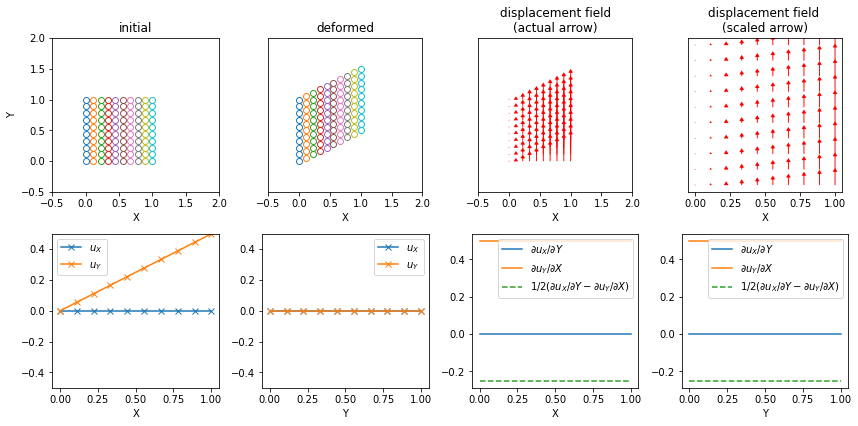

In [148]:
#icase=0 ## pure rotation
#icase=1 ## simple shear (X)
icase=2 ## simple shear (Y)
if icase==0:
    th=45.
    r=calc_rot(th)
    print('tan(angle):',np.tan(th*np.pi/180.))
    print('sin(angle):',np.cos(th*np.pi/180.))
    print(r)
elif icase==1:
    r=np.zeros((2,2))
    r[0,0]=0
    r[0,1]=0.5
    r[1,0]=0.
    r[1,1]=0
elif icase==2:
    r=np.zeros((2,2))
    r[0,0]=0
    r[0,1]=0
    r[1,0]=0.5
    r[1,1]=0    
    
    

u_x=r[0,0]*X+r[0,1]*Y
u_y=r[1,0]*X+r[1,1]*Y
#u_y[::]=0

fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(241)
ax2=fig.add_subplot(242)
ax3=fig.add_subplot(243)
ax4=fig.add_subplot(244)
ax5=fig.add_subplot(245)
ax6=fig.add_subplot(246)
ax7=fig.add_subplot(247)
ax8=fig.add_subplot(248)
ax1.plot(X,Y,'o',mfc='None')
ax2.plot(X+u_x,Y+u_y,'o',mfc="None")
ax3.quiver(X,Y,u_x,u_y,color='r',scale_units='y',scale=1,headwidth=5,headlength=4.0)
ax4.quiver(X,Y,u_x,u_y,color='r',scale_units='y',headwidth=5,headlength=4.0)

buf=1.0
#ax1.set_xlim(xl[0]+u_x[0][0]-buf,xl[1]+u_x[-1][-1]+buf)
#ax1.set_ylim(yl[0]+u_y[0][0]-buf,yl[1]+u_y[-1][-1]+buf)

for k in range(len(fig.axes)):
    ax=fig.axes[k]

    ax.set_xlabel('X')
    #ax.set_ylabel('Y')
    if 4>k>0:
        ax.set_yticks([])
        ax.set_aspect('equal')

ax1.set_ylabel('Y')
ax1.set_title('initial')
ax2.set_title('deformed')
ax3.set_title(r"""displacement field
(actual arrow)""")
ax4.set_title(r"""displacement field 
(scaled arrow)""")

#ylims=ax2.get_ylim()
#xlims=ax2.set_xlim()
#for ax in fig.axes[:]:
#    ax.set_xlim(xlims)
#    ax.set_ylim(ylims)
for ax in fig.axes[:3:]:
    ax.set_xlim(-0.5,2)
    ax.set_ylim(-0.5,2)

    
ax5.plot(X[0,:],u_x[0,:],'-x',label=r'$u_X$')
ax5.plot(X[0,:],u_y[0,:],'-x',label=r'$u_Y$')
ax6.plot(Y[:,0],u_x[:,0],'-x',label=r'$u_X$')
ax6.plot(Y[:,0],u_y[:,0],'-x',label=r'$u_Y$')


#ax7.plot(X[0,:],np.ones(X[0,:].shape)*r[0,0],label=r'$\partial u_X/\partial X$')
ax7.plot(X[0,:],np.ones(X[0,:].shape)*r[0,1],label=r'$\partial u_X/\partial Y$')
ax7.plot(X[0,:],np.ones(X[0,:].shape)*r[1,0],label=r'$\partial u_Y/\partial X$')
ax7.plot(X[0,:],np.ones(X[0,:].shape)*(r[0,1]-r[1,0])/2.,'--',label=r'$1/2(\partial u_X/\partial Y-\partial u_Y/\partial X)$')

ax8.plot(Y[:,0],np.ones(Y[:,0].shape)*r[0,1],label=r'$\partial u_X/\partial Y$')
ax8.plot(Y[:,0],np.ones(Y[:,0].shape)*r[1,0],label=r'$\partial u_Y/\partial X$')
ax8.plot(Y[:,0],np.ones(Y[:,0].shape)*(r[0,1]-r[1,0])/2.,'--',label=r'$1/2(\partial u_X/\partial Y-\partial u_Y/\partial X)$')

#ax8.plot(Y[:,0],np.ones(Y[:,0].shape)*r[1,1],label=r'$\partial u_Y/\partial Y$')


ax5.set_xlabel('X');ax6.set_xlabel('Y')
ax7.set_xlabel('X');ax8.set_xlabel('Y')


for ax in [ax5,ax6]:
    ax.set_ylim(-0.5,0.5)

for ax in fig.axes[4:]:
    ax.legend(loc='best')    

fig.tight_layout()    
fig.savefig('/tmp/pure_rotation.pdf')

In [121]:
np.ones(Y[0,:].shape)*r[1,1]

array([-0.06030738, -0.06030738, -0.06030738, -0.06030738, -0.06030738,
       -0.06030738, -0.06030738, -0.06030738, -0.06030738, -0.06030738])

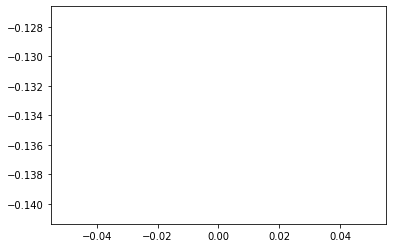

In [97]:
plot(Y[0,:],np.ones(Y[0,:].shape)*r[1,1],label=r'$\partial u_Y/\partial Y$')